In [1]:
# modify these for your own computer
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'

data_dir = '/Users/iaincarmichael/data/courtlistener/'

In [2]:
import sys

# graph package
import igraph as ig

from datetime import datetime
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# our code
sys.path.append(repo_directory + 'code/')

from helpful_functions import case_info



# some sub directories that get used
network_name = 'scotus'
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'


# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# this will be a little slow the first time you run it
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

print 'loaded %s network with %d cases and %d edges' % (network_name, len(G.vs), len(G.es))

loaded scotus network with 27885 cases and 234312 edges


/Users/iaincarmichael/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  from ipykernel import kernelapp as app


# grab brown vs board subgraph

In [5]:
bvb = G.vs.select(name='105221')[0]


sg = G.subgraph(G.neighbors(bvb))
sg.to_undirected()

sg.delete_vertices(sg.vs.select(_degree=0)) #remove unconnected compoenets

In [6]:
sg.summary()

'IGRAPH UN-- 166 1013 -- \n+ attr: court (v), date (v), id (v), issueArea (v), name (v), num_words (v), year (v)'

# time vs. degree layout

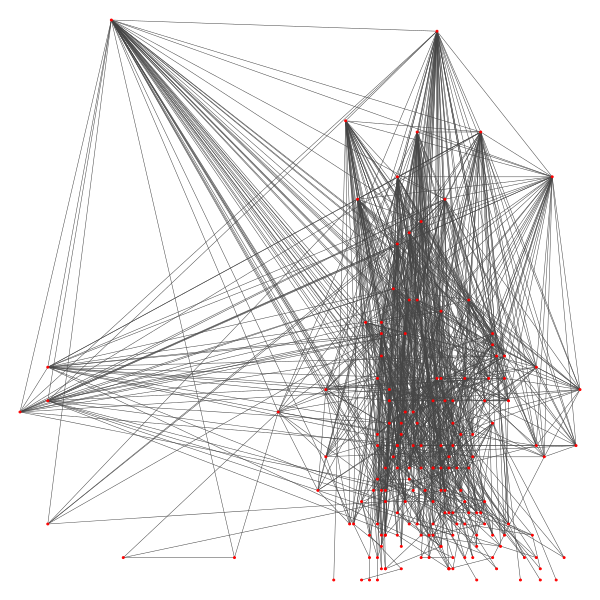

In [8]:
layout = []

for v in sg.vs:
    layout.append([v['year'], -v.indegree()])

visual_style = {}
visual_style["layout"] = layout

# # vertices

visual_style['vertex_size'] = 2

visual_style['vertex_color'] = 'red'
visual_style['vertex_frame_color'] = 'red'

visual_style['edge_arrow_size'] = 0
visual_style['edge_width'] = .5
visual_style['edge_alpha'] = .5

ig.plot(sg, **visual_style)

# graph laplacian layout

In [9]:
L = np.matrix(sg.laplacian())

In [10]:
Lambda, V = np.linalg.eig(L)

eig_order = Lambda.argsort()[::-1]
Lambda = Lambda[eig_order]

V = V[:,eig_order]

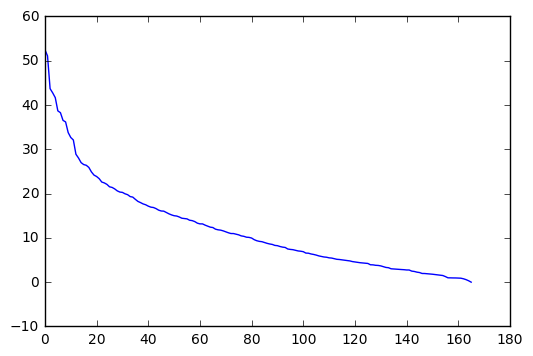

In [11]:
plt.plot(range(len(Lambda)), Lambda)

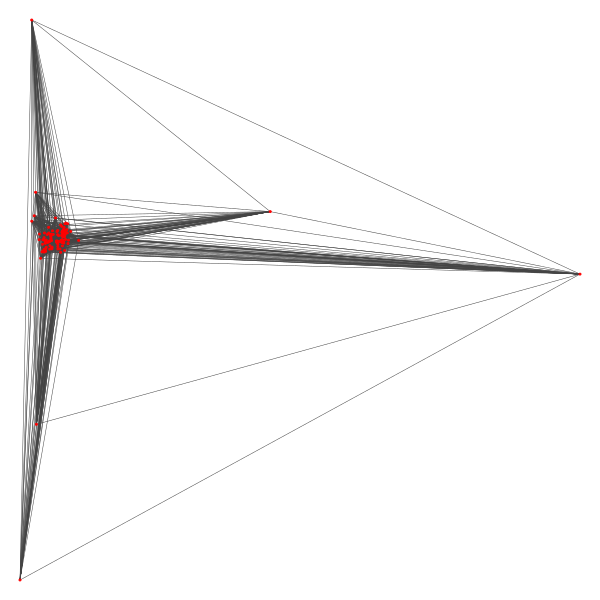

In [12]:
layout = []

for i in range(len(sg.vs)):
    layout.append([V[i, 1], V[i, 2]])

visual_style = {}
visual_style["layout"] = layout

# # vertices

visual_style['vertex_size'] = 2

visual_style['vertex_color'] = 'red'
visual_style['vertex_frame_color'] = 'red'

visual_style['edge_arrow_size'] = 0
visual_style['edge_width'] = .5
visual_style['edge_alpha'] = .5

ig.plot(sg, **visual_style)

# SCOTUS

In [5]:
%%time
L = np.matrix(G.laplacian())

CPU times: user 1min 44s, sys: 17.7 s, total: 2min 1s
Wall time: 2min 4s


In [9]:
# doesn't seem to work
from scipy.sparse import csr_matrix
from  scipy.sparse.linalg import eigs

L_sparse = csr_matrix(L, dtype = np.float)
vals, vecs = eigs(L_sparse, k=3)

ArpackError: ARPACK error -9999: Could not build an Arnoldi factorization. IPARAM(5) returns the size of the current Arnoldi factorization. The user is advised to check that enough workspace and array storage has been allocated.

In [ ]:
Lambda, V = np.linalg.eig(L)

eig_order = Lambda.argsort()[::-1]
Lambda = Lambda[eig_order]

V = V[:,eig_order]

In [ ]:
layout = []

for i in range(len(G.vs)):
    layout.append([V[i, 1], V[i, 2]])

visual_style = {}
visual_style["layout"] = layout

# # vertices

visual_style['vertex_size'] = 2

visual_style['vertex_color'] = 'red'
visual_style['vertex_frame_color'] = 'red'

visual_style['edge_arrow_size'] = 0
visual_style['edge_width'] = .5
visual_style['edge_alpha'] = .5

ig.plot(sg, **visual_style)